In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [4]:
women = df.loc[df['Sex']=='female']['Survived'].mean()
women

0.7420382165605095

In [6]:
men = df.loc[df['Sex']=='male']['Survived'].mean()
men

0.18890814558058924

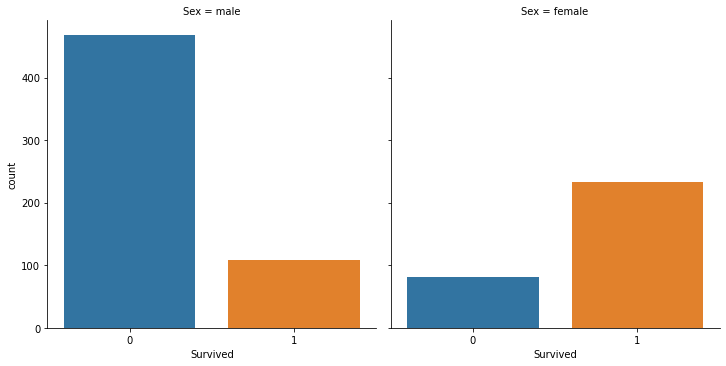

In [9]:
# Sex, Survived

sns.catplot(x='Survived', col='Sex', kind='count', data=df)
plt.show()

<AxesSubplot:title={'center':'dead'}, xlabel='Age', ylabel='Density'>

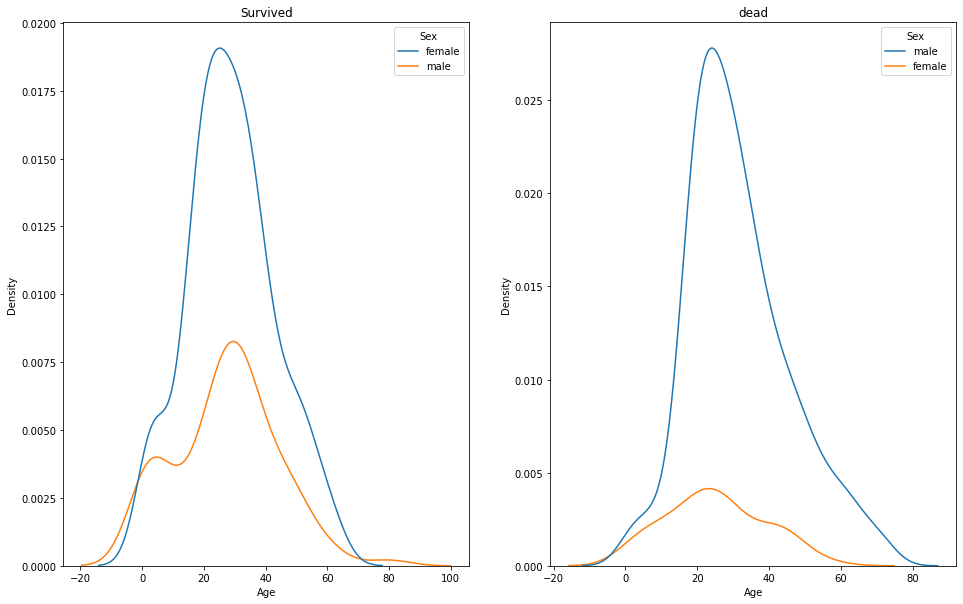

In [38]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax.set_title('Survived')
ax2.set_title('dead')
sns.kdeplot(x='Age', hue='Sex', data=df[df['Survived']==1], ax=ax)
sns.kdeplot(x='Age', hue='Sex', data=df[df['Survived']==0], ax=ax2)

<AxesSubplot:xlabel='Age', ylabel='Density'>

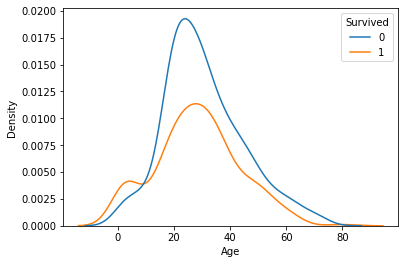

In [34]:
sns.kdeplot(x = 'Age',hue='Survived', data=df[['Survived', 'Age']])

In [39]:
train = df.copy()

In [42]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [49]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [74]:
train['Age'] = train['Age'].apply(lambda x: -1 if str(x)=='nan' else x)
train['Sex'] = train['Sex'].replace(['male', 'female'], [0,1])
test['Age'] = test['Age'].apply(lambda x: -1 if str(x)=='nan' else x)
test['Sex'] = test['Sex'].replace(['male', 'female'], [0,1])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,-1.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [56]:
# 아래 4개의 attributes 만이 중요하다고 판단됩니다.
x_train = train[['Pclass', 'Sex','SibSp', 'Parch']]
y_train = train['Survived']

In [68]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

In [69]:
model.fit(x_train, y_train, epochs=100, batch_size=30)

Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 0.6464 - accuracy: 0.6001
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 0.5581 - accuracy: 0.7462
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7920
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4980 - accuracy: 0.7831
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7855
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 0.4954 - accuracy: 0.7713

In [70]:
model.evaluate(x_train, y_train)

28/28 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.8081


[0.42504698038101196, 0.808080792427063]

In [79]:
x_test = test[['Pclass','Sex','SibSp', 'Parch']]
x_test
res = model.predict_classes(x_test)

C:\Users\bluesun\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [82]:
res = res.flatten()
res

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [84]:
submission = test[['PassengerId']]
submission['Survived'] = res
submission

c:\users\bluesun\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [88]:
submission[['Survived', 'PassengerId']].to_csv('submission.csv', sep=',', na_rep='NaN')